In [195]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns 

In [196]:
median_method_row = pd.read_csv('result_grid_median.csv')
filled = pd.read_csv('result_grid_rowfilled.csv')
unfilled = pd.read_csv('result_grid_final.csv')
colsfilled = pd.read_csv('result_grid_columnfilled.csv')

In [197]:
#y = filled.loc[:,'average_index'].values.reshape(-1,1)
#x =unfilled.loc[:, 'average_index'].values.reshape(-1, 1) 
#y2 = median_method_row.loc[:,'average_index'].values.reshape(-1,1)
#y3 = colsfilled.loc[:,'average_index'].values.reshape(-1,1)

In [198]:
y =filled[['average_index']]
x = unfilled[['average_index']]
y2 = median_method_row[['average_index']]
y3 = colsfilled[['average_index']]

In [199]:
filled.describe()

,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,58.513479,87.545145,24.295223,11.402687,16.125000,110008.437500,2.312500
std,2.370385,2.631731,3.814638,1.366631,16.780445,101483.119456,2.468974
min,53.559462,80.500442,17.443493,8.840306,1.000000,7811.000000,0.000000
25%,57.104071,86.765160,21.458329,10.487638,6.750000,52919.250000,1.000000
50%,58.330698,87.770312,23.636820,11.482655,10.500000,94782.000000,1.500000
75%,60.233643,89.189343,28.430177,12.446468,18.250000,130382.000000,2.750000
max,63.425972,90.993789,30.311780,13.217373,70.000000,443789.000000,9.000000


In [200]:
unfilled.describe()

,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000
mean,30.044089,79.443479,5.695269,12.804475,16.125000,108453.375000,2.8125
std,3.279168,8.104742,2.648553,2.665003,16.780445,96319.133974,3.1245
min,22.440682,57.619048,2.950311,6.878671,1.000000,7798.000000,0.0000
25%,28.851101,78.612836,3.743961,11.736852,6.750000,53035.500000,1.0000
50%,30.597931,79.693323,4.378882,12.612416,10.500000,94518.000000,1.5000
75%,31.466590,82.618185,7.574035,14.855404,18.250000,130007.500000,5.0000
max,34.621705,90.993789,11.335404,16.795658,70.000000,420110.000000,10.0000


In [201]:
median_method_row.describe()

,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,62.192995,98.097564,17.331570,11.055674,16.125000,110011.937500,2.312500
std,2.544316,1.015532,6.128798,0.979823,16.780445,101494.529593,2.468974
min,57.497806,96.825397,2.951598,8.892910,1.000000,7811.000000,0.000000
25%,60.647645,97.119565,13.405797,10.668782,6.750000,52919.250000,1.000000
50%,61.898952,98.015873,16.275086,11.425777,10.500000,94782.000000,1.500000
75%,63.619506,99.036281,21.607143,11.593195,18.250000,130382.000000,2.750000
max,67.580288,100.000000,28.882116,12.488002,70.000000,443841.000000,9.000000


In [202]:
colsfilled.describe()

,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000
mean,74.287190,88.588715,47.633847,4.663349,16.125000,109608.375000,2.37500
std,2.889060,2.636278,6.526424,1.108637,16.780445,100082.534693,2.47319
min,70.129924,83.857035,37.048260,3.500678,1.000000,7811.000000,0.00000
25%,71.464661,86.758628,42.440762,3.982138,6.750000,52919.250000,1.00000
50%,74.488284,89.015623,48.330458,4.510097,10.500000,94782.000000,1.50000
75%,76.036660,90.527950,52.793668,4.897117,18.250000,130382.000000,3.50000
max,78.905794,91.981366,56.125295,8.344020,70.000000,437388.000000,9.00000


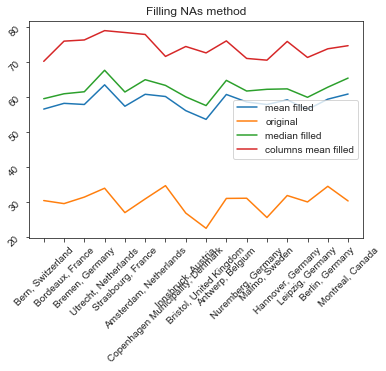

In [203]:
plt.plot(filled['place'], filled['average_index'], label = "mean filled")
plt.plot(filled['place'],unfilled['average_index'],label= 'original')
plt.plot(filled['place'],median_method_row['average_index'],label ='median filled')
plt.plot(filled['place'],colsfilled['average_index'],label = 'columns mean filled')
plt.tick_params(labelrotation=45)
plt.title('Filling NAs method')
plt.legend()
plt.show()

### Regression of NAs filled with mean of rows(segments)

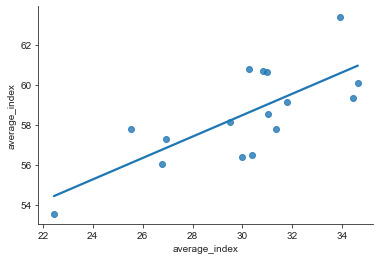

In [205]:
sns.set_style('ticks')
sns.regplot(x, y, ci=None)
sns.despine()  

In [234]:
x = sm.add_constant(x)
model = sm.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_index   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     17.13
Date:                Fri, 03 Jul 2020   Prob (F-statistic):            0.00100
Time:                        22:49:54   Log-Likelihood:                -29.602
No. Observations:                  16   AIC:                             63.20
Df Residuals:                      14   BIC:                             64.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.4031      3.914     10.833      0.000      34.008      50.798
average_index     0.5362      0.130      4.139      0.001       0.258       0.814
==============================================================================
Omnibus:                        2.020   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.182
Skew:                           0.353   Prob(JB):                        0.554
Kurtosis:                       1.871   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

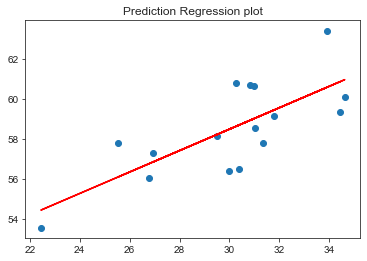

In [257]:
y_pred = result.predict(x)
plt.scatter(x.iloc[:,1], y)
plt.plot(x.iloc[:,1], y_pred, color='red')
plt.title('Prediction Regression plot')
plt.show()

### Regression for NAs filled with median of the rows(segments)

In [210]:
model2 = sm.OLS(y2, sm.add_constant(x))
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_index   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     8.694
Date:                Fri, 03 Jul 2020   Prob (F-statistic):             0.0106
Time:                        22:24:14   Log-Likelihood:                -33.264
No. Observations:                  16   AIC:                             70.53
Df Residuals:                      14   BIC:                             72.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            47.7645      4.921      9.707      0.000      37.211      58.318
average_index     0.4802      0.163      2.949      0.011       0.131       0.830
==============================================================================
Omnibus:                        2.340   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                1.440
Skew:                           0.482   Prob(JB):                        0.487
Kurtosis:                       1.891   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression for NAs filled with mean of variable(columns)

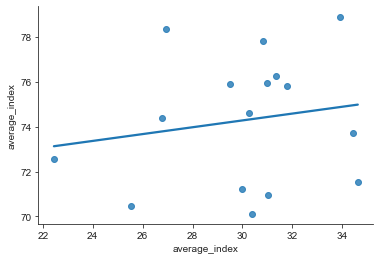

In [211]:
sns.set_style('ticks')
sns.regplot(x, y3, ci=None)
sns.despine()  

In [212]:
model_meancols = sm.OLS(y3, sm.add_constant(x))
resultmeancols = model_meancols.fit()
resultmeancols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_index   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.4307
Date:                Fri, 03 Jul 2020   Prob (F-statistic):              0.522
Time:                        22:25:34   Log-Likelihood:                -38.919
No. Observations:                  16   AIC:                             81.84
Df Residuals:                      14   BIC:                             83.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            69.7143      7.007      9.950      0.000      54.686      84.742
average_index     0.1522      0.232      0.656      0.522      -0.345       0.650
==============================================================================
Omnibus:                        2.170   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                0.997
Skew:                          -0.006   Prob(JB):                        0.607
Kurtosis:                       1.777   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check for difference with and without population density filter
### There is no difference, since it is removed in most cases due to absence of certan variables

In [144]:
no_pop = pd.read_csv('result_grid_no_pop_filter.csv')

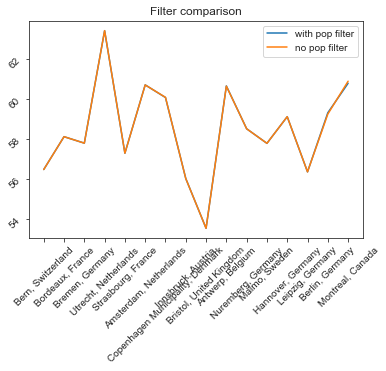

In [145]:
plt.plot(filled['place'], filled['average_index'], label = "with pop filter")
plt.plot(filled['place'],no_pop['average_index'],label= 'no pop filter')
plt.tick_params(labelrotation=45)
plt.title('Filter comparison')
plt.legend()
plt.show()

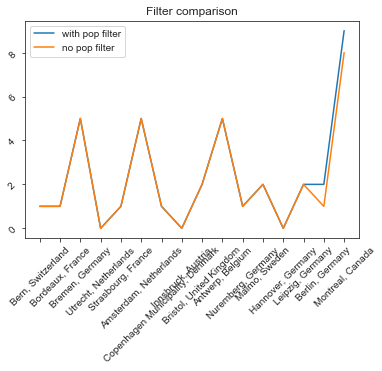

In [146]:
plt.plot(filled['place'], filled['unused_grids'], label = "with pop filter")
plt.plot(filled['place'],no_pop['unused_grids'],label= 'no pop filter')
plt.tick_params(labelrotation=45)
plt.title('Filter comparison')
plt.legend()
plt.show()